In [2]:
# # prompt: mount the ddrive

# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
import pandas as pd
file_path = 'es-1m.csv'


# Define column names based on Yahoo Finance format
columns = ["Date", "Time", "Open", "High", "Low", "Close", "Volume"]
stock_df = pd.read_csv(file_path, delimiter=';', names=columns, parse_dates=[["Date", "Time"]])

display(stock_df.head())

/var/folders/pd/_g9sx9x53l5gbdc7x6j8jff40000gn/T/ipykernel_62018/3149813706.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  stock_df = pd.read_csv(file_path, delimiter=';', names=columns, parse_dates=[["Date", "Time"]])


,Date_Time,Open,High,Low,Close,Volume
0,01/04/2007 17:00:00,1431.75,1432.00,1431.25,1431.75,393
1,01/04/2007 17:01:00,1431.75,1431.75,1431.25,1431.50,461
2,01/04/2007 17:02:00,1431.50,1431.50,1431.50,1431.50,64
3,01/04/2007 17:03:00,1431.25,1431.50,1431.25,1431.25,145
4,01/04/2007 17:04:00,1431.25,1431.25,1430.75,1430.75,206


In [ ]:
stock_df.rename(columns={"Date_Time": "Datetime"}, inplace=True)
stock_df["Datetime"] = pd.to_datetime(stock_df["Datetime"], format="%d/%m/%Y %H:%M:%S")
stock_df.set_index("Datetime", inplace=True)

# Convert numeric columns to float
stock_df[["Open", "High", "Low", "Close"]] = stock_df[["Open", "High", "Low", "Close"]].astype(float)
stock_df["Volume"] = stock_df["Volume"].astype(int)

In [ ]:

display(stock_df.shape)


(6212845, 5)

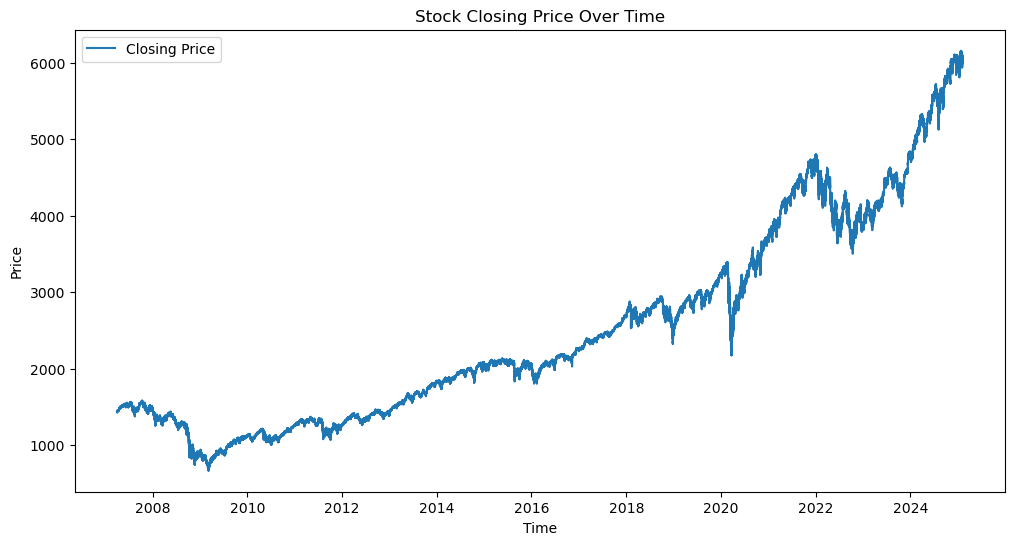

In [ ]:
#  Visualizing Closing Price Trend
plt.figure(figsize=(12, 6))
plt.plot(stock_df["Close"], label='Closing Price')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Checking for missing values
print("Missing values:\n", stock_df.isnull().sum())



Missing values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
# Feature Engineering: Moving Averages
stock_df['MA7'] = stock_df['Close'].rolling(window=7).mean()
stock_df['MA21'] = stock_df['Close'].rolling(window=21).mean()

# Feature Engineering: Volatility
stock_df['Volatility'] = stock_df['Close'].rolling(window=10).std()


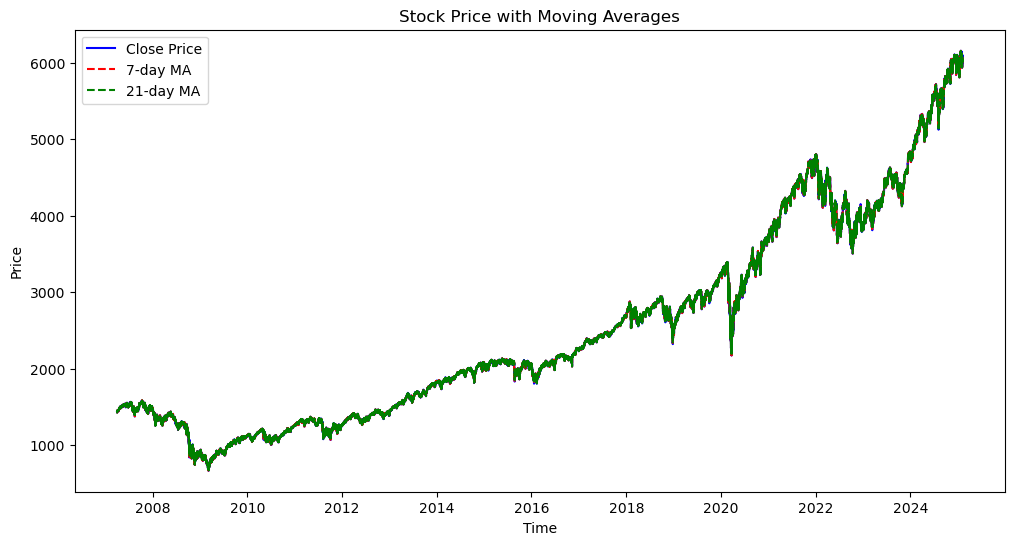

In [ ]:
# Visualization of Feature Engineering
plt.figure(figsize=(12, 6))
plt.plot(stock_df['Close'], label='Close Price', color='blue')
plt.plot(stock_df['MA7'], label='7-day MA', color='red', linestyle='dashed')
plt.plot(stock_df['MA21'], label='21-day MA', color='green', linestyle='dashed')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

stock_df['RSI'] = compute_rsi(stock_df['Close'])


In [ ]:
# MACD (Moving Average Convergence Divergence)
stock_df['EMA12'] = stock_df['Close'].ewm(span=12, adjust=False).mean()
stock_df['EMA26'] = stock_df['Close'].ewm(span=26, adjust=False).mean()
stock_df['MACD'] = stock_df['EMA12'] - stock_df['EMA26']
stock_df['Signal_Line'] = stock_df['MACD'].ewm(span=9, adjust=False).mean()

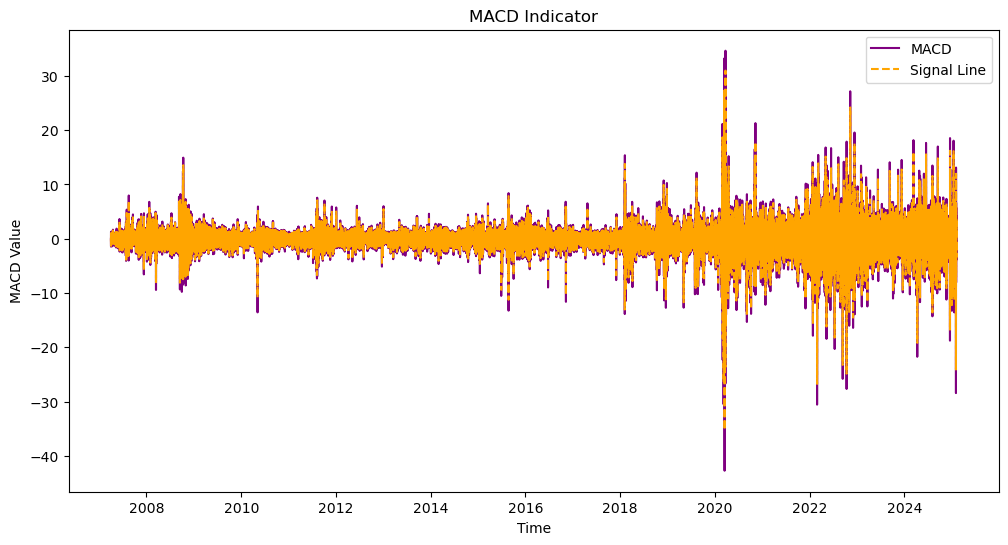

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_df['MACD'], label='MACD', color='purple')
plt.plot(stock_df['Signal_Line'], label='Signal Line', color='orange', linestyle='dashed')
plt.title("MACD Indicator")
plt.xlabel("Time")
plt.ylabel("MACD Value")
plt.legend()
plt.show()

In [ ]:
# Bollinger Bands
stock_df['Upper_Band'] = stock_df['MA21'] + (stock_df['Volatility'] * 2)
stock_df['Lower_Band'] = stock_df['MA21'] - (stock_df['Volatility'] * 2)


In [ ]:
# Stochastic Oscillator
stock_df['L14'] = stock_df['Low'].rolling(window=14).min()
stock_df['H14'] = stock_df['High'].rolling(window=14).max()
stock_df['%K'] = (stock_df['Close'] - stock_df['L14']) / (stock_df['H14'] - stock_df['L14']) * 100
stock_df['%D'] = stock_df['%K'].rolling(window=3).mean()

In [ ]:
# Lagged Returns
stock_df['Lagged_Return'] = stock_df['Close'].shift(1)


In [ ]:
# Time-Based Features
stock_df['Day_of_Week'] = stock_df.index.dayofweek
stock_df['Hour_of_Day'] = stock_df.index.hour

In [ ]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
stock_df[['PCA1', 'PCA2', 'PCA3']] = pca.fit_transform(stock_df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna())


In [ ]:
# sns.pairplot(stock_df[['Close', 'Volatility', 'RSI', 'MACD', '%K']].dropna())
# plt.show()

# print(stock_df.head())

KeyboardInterrupt: 

In [ ]:

# # 1. Pairplot for selected features:
# sns.pairplot(stock_df[['Close', 'Volatility', 'RSI', 'MACD', '%K', 'PCA1', 'PCA2', 'PCA3']].dropna())
# plt.show()

# # 2. Correlation heatmap:
# plt.figure(figsize=(12, 10))
# sns.heatmap(stock_df[['Close', 'Volatility', 'RSI', 'MACD', '%K', 'PCA1', 'PCA2', 'PCA3']].corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Matrix")
# plt.show()


In [ ]:
# 3. Scatter plots for PCA components vs. Close price:
# plt.figure(figsize=(12, 6))
# plt.scatter(stock_df['PCA1'], stock_df['Close'], alpha=0.5)
# plt.title("PCA1 vs. Close Price")
# plt.xlabel("PCA1")
# plt.ylabel("Close Price")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.scatter(stock_df['PCA2'], stock_df['Close'], alpha=0.5)
# plt.title("PCA2 vs. Close Price")
# plt.xlabel("PCA2")
# plt.ylabel("Close Price")
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.scatter(stock_df['PCA3'], stock_df['Close'], alpha=0.5)
# plt.title("PCA3 vs. Close Price")
# plt.xlabel("PCA3")
# plt.ylabel("Close Price")
# plt.show()

In [ ]:
stock_df.head()

,Open,High,Low,Close,Volume,MA7,MA21,Volatility,RSI,EMA12,...,L14,H14,%K,%D,Lagged_Return,Day_of_Week,Hour_of_Day,PCA1,PCA2,PCA3
Datetime,,,,,,,,,,,,,,,,,,,,,
2007-04-01 17:00:00,1431.75,1432.00,1431.25,1431.75,393,NaN,NaN,NaN,NaN,1431.750000,...,NaN,NaN,NaN,NaN,NaN,6,17,1526.479247,-1758.645439,-0.255253
2007-04-01 17:01:00,1431.75,1431.75,1431.25,1431.50,461,NaN,NaN,NaN,NaN,1431.711538,...,NaN,NaN,NaN,NaN,1431.75,6,17,1559.406005,-1699.148483,-0.078408
2007-04-01 17:02:00,1431.50,1431.50,1431.50,1431.50,64,NaN,NaN,NaN,NaN,1431.678994,...,NaN,NaN,NaN,NaN,1431.50,6,17,1368.561081,-2047.268098,0.229375
2007-04-01 17:03:00,1431.25,1431.50,1431.25,1431.25,145,NaN,NaN,NaN,NaN,1431.612995,...,NaN,NaN,NaN,NaN,1431.50,6,17,1407.850344,-1976.433797,0.064392
2007-04-01 17:04:00,1431.25,1431.25,1430.75,1430.75,206,NaN,NaN,NaN,NaN,1431.480227,...,NaN,NaN,NaN,NaN,1431.25,6,17,1437.738913,-1923.254224,-0.122328


#Model training - Arima

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
scaler = MinMaxScaler()
stock_df[['Close']] = scaler.fit_transform(stock_df[['Close']])


In [ ]:
# Train-Test Split using sklearn's train_test_split
train_arima, test_arima = train_test_split(stock_df['Close'], test_size=0.8, shuffle=False)

arima_model = ARIMA(train_arima, order=(5,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())

test_predictions = arima_result.forecast(steps=len(test_arima))




NameError: name 'train_test_split' is not defined

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_arima, label='Training Data')
plt.plot(test_arima, label='Actual Test Data')
plt.plot(test_arima.index, test_predictions, label='ARIMA Predictions', linestyle='dashed')
plt.legend()
plt.title("ARIMA Model Predictions")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

LSTM - Model training

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1, 1))


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(scaled_data, seq_length)


In [ ]:
# Spliting the  data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
def build_model(neurons=50, learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model = KerasRegressor(build_fn=build_model, verbose=0)


In [ ]:
param_grid = {
    'neurons': [50, 100],
    'batch_size': [32, 64],
    'epochs': [20, 50],
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3]
}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
print(f"Best parameters: {grid_result.best_params_}")


In [ ]:
best_model = grid_result.best_estimator_.model
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")